In [1]:
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.experimental import RMSprop
from PIL import Image
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.preprocessing import image

In [2]:
# Dictionary to store image paths
image_paths = {
    "train_cataract": [],
    "train_normal": [],
    "test_cataract": [],
    "test_normal": []
}

# Walk through the directory
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train\\cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train\\normal" in path:
            image_paths["train_normal"].append(path)
        elif "test\\cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test\\normal" in path:
            image_paths["test_normal"].append(path)

In [3]:
len(image_paths["train_normal"])

250

size of image : (512, 512, 3)


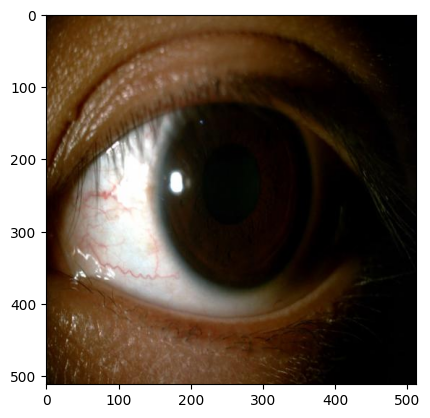

In [4]:
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

size of image : (200, 200, 3)


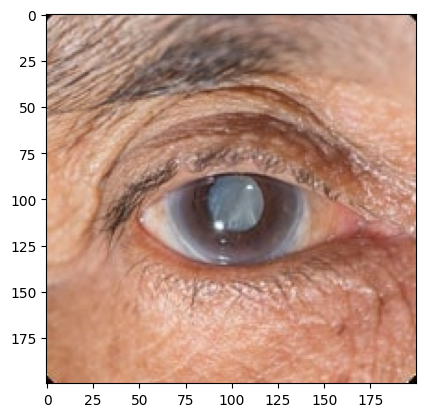

In [5]:
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

In [6]:
training_dir = "data\\train\\"
image_size = (55, 94, 3)
target_size = (55, 94)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.5

)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 689 images belonging to 2 classes.


In [9]:
model = Sequential([
    # Convolutional Neural Network (CNN) for feature extraction
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense Neural Network (DNN) for classification
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 92, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 46, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 44, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 10, 128)        0

In [11]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [12]:
early_stop = EarlyStopping(monitor='accuracy', patience=5)

history = model.fit(
    train_generator,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30


 8/22 [=========>....................] - ETA: 1s - loss: 1.0096 - accuracy: 0.6515

c:\Users\L E N O V O\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/22 [==============================] - 4s 158ms/step - loss: 0.7831 - accuracy: 0.6299
Epoch 2/30
22/22 [==============================] - 3s 153ms/step - loss: 0.6529 - accuracy: 0.6299
Epoch 3/30
22/22 [==============================] - 4s 165ms/step - loss: 0.6166 - accuracy: 0.6734
Epoch 4/30
22/22 [==============================] - 3s 157ms/step - loss: 0.5109 - accuracy: 0.7518
Epoch 5/30
22/22 [==============================] - 4s 165ms/step - loss: 0.4627 - accuracy: 0.7692
Epoch 6/30
22/22 [==============================] - 4s 157ms/step - loss: 0.4592 - accuracy: 0.8084
Epoch 7/30
22/22 [==============================] - 4s 161ms/step - loss: 0.4023 - accuracy: 0.8229
Epoch 8/30
22/22 [==============================] - 3s 158ms/step - loss: 0.3605 - accuracy: 0.8374
Epoch 9/30
22/22 [==============================] - 4s 164ms/step - loss: 0.3816 - accuracy: 0.8287
Epoch 10/30
22/22 [==============================] - 4s 167ms/step - loss: 0.3196 - accuracy: 0.8679
Epoch 11/3

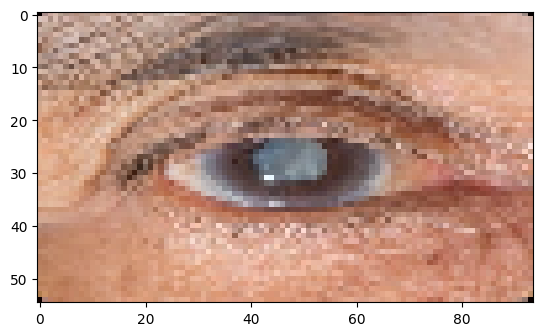

1/1 [==============================] - 0s 113ms/step
Katarak


In [13]:
def predict_image(file_path):
    # Load image
    img = image.load_img(file_path, target_size=target_size)
  
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    
    # Display the image
    plt.imshow(img)
    plt.show()
    
    prediction = model.predict(img_batch)
    
    # predict output
    if prediction[0] > 0.5:
        print("Normal")
    else:
        print("Katarak")

# ganti file_path dengan path foto yang akan di prediksi
predict_image('data/test/cataract/cataract (474).jpg')

### this part is just to test other image
def predict_image(file_path):
    # Load image
    img = image.load_img(file_path, target_size=target_size)
  
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    
    # Display the image
    plt.imshow(img)
    plt.show()
    
    prediction = model.predict(img_batch)
    
    # predict output
    if prediction[0] > 0.5:
        print("Normal")
    else:
        print("Katarak")

    #  ganti file_path dengan path foto yang akan di prediksi
predict_image('data/test/normal/normal (119).jpg')